In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi
from chapter12 import landing_position, trajectory, hang_time
import functools

%load_ext autoreload
%autoreload 2

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


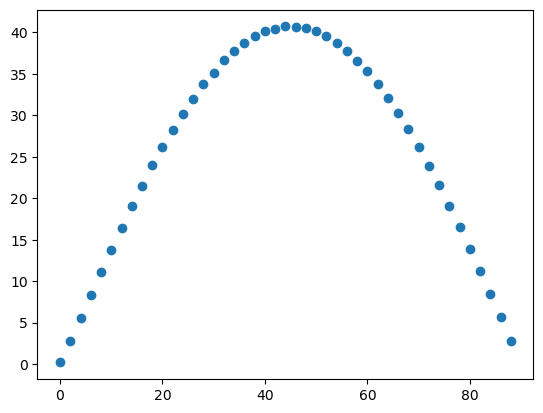

In [46]:
angles = range(0,90,2)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)


Exercise 12.1: How far does the cannonball go when fired at an angle of 50° from an initial height of zero? How about if it is fired at an angle of 130°?

In [47]:
landing_position(trajectory(50))

40.10994684444007

In [48]:
landing_position(trajectory(130))

-40.10994684444007

Exercise 12.2-Mini Project: Enhance the plot_trajectories function to draw a large dot on the trajectory graph at each passing second so we can see the passing of time on the plot.


In [49]:
def get_time_indecies(ts):
    t = 0
    times_index = []
    for i,time in enumerate(ts):
        if time >= t:
            times_index.append(i)
            t += 1
    return times_index

def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            time_indecies = get_time_indecies(traj[0])
            plt.scatter([xs[t_i] for t_i in time_indecies], [zs[t_i] for t_i in time_indecies])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

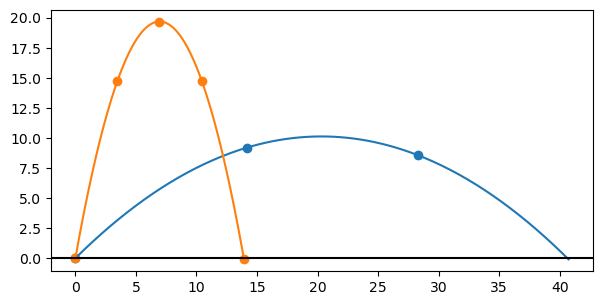

In [50]:
plot_trajectories(*[trajectory(45), trajectory(80)], show_seconds=True)

Exercise 12.3: Make a scatter plot of hang time versus angle for angles between 0 and 180°. Which launch angle produces the maximum hang time?

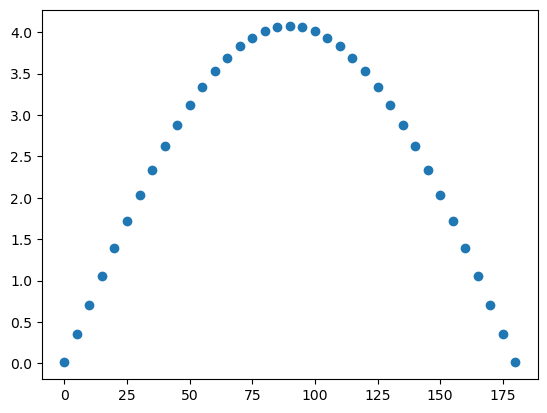

In [51]:
angles = range(0, 181, 5)
hang_times = list(map(lambda theta: hang_time(trajectory(theta)), angles))
plt.scatter(angles, hang_times)

In [53]:
heighest_point = functools.reduce(lambda acc,curr: curr if curr[1] > acc[1] else acc, zip(angles, hang_times))
print(f"Angle with the heighest elevation: {heighest_point[0]}")

Angle with the heighest elevation: 90


Exercise 12.4−Mini Project: Write a function plot_trajectory_metric that plots the result of any metric we want over a given set of theta (θ) values.